# Heading & intro

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import, load, modify the dataset:

In [21]:
# Import & load the dataset
topcover_data = pd.read_excel("topcover_pilot.xlsx", engine='openpyxl')

# Save as dataframe
topcover_data = pd.DataFrame(topcover_data)

# Check the dataset
print(f"- The Top Cover dataset has {topcover_data.shape[0]} rows and {topcover_data.shape[1]} columns.")
display(topcover_data.head(5))

- The Top Cover dataset has 1094 rows and 12 columns.


,Pno,Amount,Gender,RG,Cover,SurrVal,Offer/APE,PercCover,CurrAge,Fee_claimed,Take-up ind,Mngt_act
0,1,6444,M,4,48024,0,1.5,0.134183,71.250000,0,0,BCD
1,2,9649,F,7,1000000,0,1.3,0.009649,60.916667,0,0,PIN
2,3,8688,M,8,800001,2250,1.1,0.010860,63.416667,0,0,PIN
3,4,7483,F,4,21713,0,4.7,0.344632,82.916667,0,0,BCD
4,5,8115,M,8,526919,0,1.3,0.015401,60.000000,0,0,BCD


Ensure correct data types:

In [6]:
# Identify columns that contain the text "ind" or "_cd" in their names
columns_to_convert = ['Pno', 'Gender', 'RG', 'Fee_claimed', 'Take-up ind', 'Mngt_act']    

# Technically Pno must also be of type object!

# Convert the data type of these columns to object
topcover_data[columns_to_convert] = topcover_data[columns_to_convert].astype('object')

# EDA - Basic statistics:

In [7]:
stats_results = [] # empty storage
df = topcover_data # easier to save as "df"

########################### Loop through each column 
for col in df.columns:
    
    # values not dependent on the data type
    data_type = df[col].dtype                          # Data type of the column
    distinct_count = df[col].nunique()                 # Number of distinct values
    null_percentage = round(df[col].isnull().mean() * 100, 2)   # Percentage of null values
    na_percentage = round(df[col].isna().mean() * 100, 2) # Percentage of NA values
    # non_null_count = df[col].notnull().sum()           # Number of non-null entries
       

    # Calculate mean, max, etc only if the column is numeric!
    if pd.api.types.is_numeric_dtype(df[col]):
        mean_val = round(df[col].mean(), 2)
        med_val = round(df[col].median(), 2)
        min_val = round(df[col].min(), 2)
        max_val = round(df[col].max(), 2)
        std_dev = round(df[col].std(), 2)
        mode_val = round(df[col].mode()[0], 2) # zero is just in case there is more than one value
        perc_25 = round(df[col].quantile(0.25), 2)
        perc_75 = round(df[col].quantile(0.25), 2)

    else:
        mean_val = med_val = min_val = max_val = std_dev = mode_val = perc_25 = perc_75 = None # return NaN


    # Get an example entry that is not null
    example_entry = df[col].dropna().iloc[0] if df[col].notna().sum() > 0 else None


    # Append the results for the current column as a dictionary
    stats_results.append({
        'Column': col,
        'Data Type': data_type,
        'Distinct Count': distinct_count,
        'Null Percentage': null_percentage,  
        'NA Percentage': na_percentage,      
        # '(n) Non-null Count': non_null_count,
        'Mean': mean_val,
        'Median': med_val,
        'Min': min_val,
        'Max': max_val,
        'Std Deviation': std_dev,   
        'Mode': mode_val,
        'Quartile 25% ': perc_25,
        'Quartile 75% ': perc_75,
        'Example entry': example_entry 
    })

# Convert the results list to a DataFrame for better readability
stats_results_df = pd.DataFrame(stats_results) 
display(stats_results_df)


,Column,Data Type,Distinct Count,Null Percentage,NA Percentage,Mean,Median,Min,Max,Std Deviation,Mode,Quartile 25%,Quartile 75%,Example entry
0,Pno,object,1094,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Amount,int64,1085,0.00,0.00,67589.29,32839.00,6444.00,1821200.00,125572.37,13402.00,22170.50,22170.50,6444
2,Gender,object,2,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
3,RG,object,7,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Cover,int64,708,0.00,0.00,629245.47,300000.00,21713.00,18868483.00,1166830.96,200000.00,150000.00,150000.00,48024
5,SurrVal,int64,430,0.00,0.00,7054.13,0.00,0.00,615611.00,27139.88,0.00,0.00,0.00,0
6,Offer/APE,float64,235,0.00,0.00,10.51,9.65,1.00,45.10,6.05,9.30,5.80,5.80,1.5
7,PercCover,float64,1093,0.00,0.00,0.15,0.13,0.01,0.54,0.10,0.13,0.08,0.08,0.134183
8,CurrAge,float64,383,0.00,0.00,70.24,69.92,42.33,92.58,8.21,68.58,65.00,65.00,71.25
9,Fee_claimed,object,2,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Change the data 

In [35]:
categorical_features = ['Gender', 'RG', 'Fee_claimed', 'Take-up ind', 'Mngt_act']

# Function to replace missing values in the data
def replace_missing_values(df, ignore_columns, strategy='mean'):
    
    df.replace('N/A', pd.NA, inplace=True)
    
    for column in df.columns:
        if column not in ignore_columns:
            if df[column].isnull().any():
                if strategy == 'mean':
                    replacement_value = df[column].mean()
                elif strategy == 'median':
                    replacement_value = df[column].median()
                else:
                    raise ValueError("Strategy must be either 'mean' or 'median'")
                df[column].fillna(replacement_value, inplace=True)
    return df


# Function to trim whitespace from strings
def trim_strings(x):
    if isinstance(x, str):
        return x.strip()
    return x

# Apply the function only to string columns
df = df.applymap(trim_strings)

Mngt_act
PIN    632
BCD    251
ACD     81
P5C      7
P5P      7
         5
Name: count, dtype: int64

In [8]:
# Function to calculate age bands

def age_bands(x):
    if x < 65:
        return 0
    else:
        return 1


In [9]:
# New features

# 1) Surender_val_multiple = Amount/Surrender value
# 2) SurrVal/APE
# 3) SurrVal/Cover
# 4) SurrVal ind
# 5) Age bands

temp_df = topcover_data
temp_df['APE'] = topcover_data['Amount'] / topcover_data['Offer/APE']
temp_df['SurrVal/APE'] = topcover_data['SurrVal']/topcover_data['APE']
temp_df['SurrVal/Cover'] = topcover_data['Amount']/topcover_data['Cover']
temp_df['Offer/SurrVal'] = np.where(topcover_data['SurrVal'] != 0, topcover_data['Amount']/topcover_data['SurrVal'], np.nan)
temp_df['SurrVal ind'] = np.where(topcover_data['SurrVal'] != 0, 1, 0)
temp_df['age_bands'] = temp_df['CurrAge'].apply(age_bands)


topcover_data_extended = temp_df

In [157]:
temp_df['age_bands']

0       5
1       5
2       5
3       5
4       5
       ..
1089    5
1090    5
1091    4
1092    5
1093    5
Name: age_bands, Length: 1094, dtype: int64

In [93]:
topcover_data['Amount'] / topcover_data['Offer/APE']

0        4296.000000
1        7422.307692
2        7898.181818
3        1592.127660
4        6242.307692
            ...     
1089     2880.000000
1090    17403.582090
1091     2152.322581
1092     2753.066667
1093     5396.470588
Length: 1094, dtype: float64

In [20]:
topcover_data.columns

Index(['Pno', 'Amount', 'Gender', 'RG', 'Cover', 'SurrVal', 'Offer/APE',
       'PercCover', 'CurrAge', 'Fee_claimed', 'Take-up ind', 'Mngt_act', 'APE',
       'SurrVal/APE', 'SurrVal/Cover', 'Offer/SurrVal', 'SurrVal ind',
       'age_bands', 'Smoker_ind', 'Socio Economic Class'],
      dtype='object')

TypeError: can only concatenate str (not "int") to str

# EDA - Visualization:

## 1. Box-and-whisker plots

c:\Developer\Projects\case-study\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


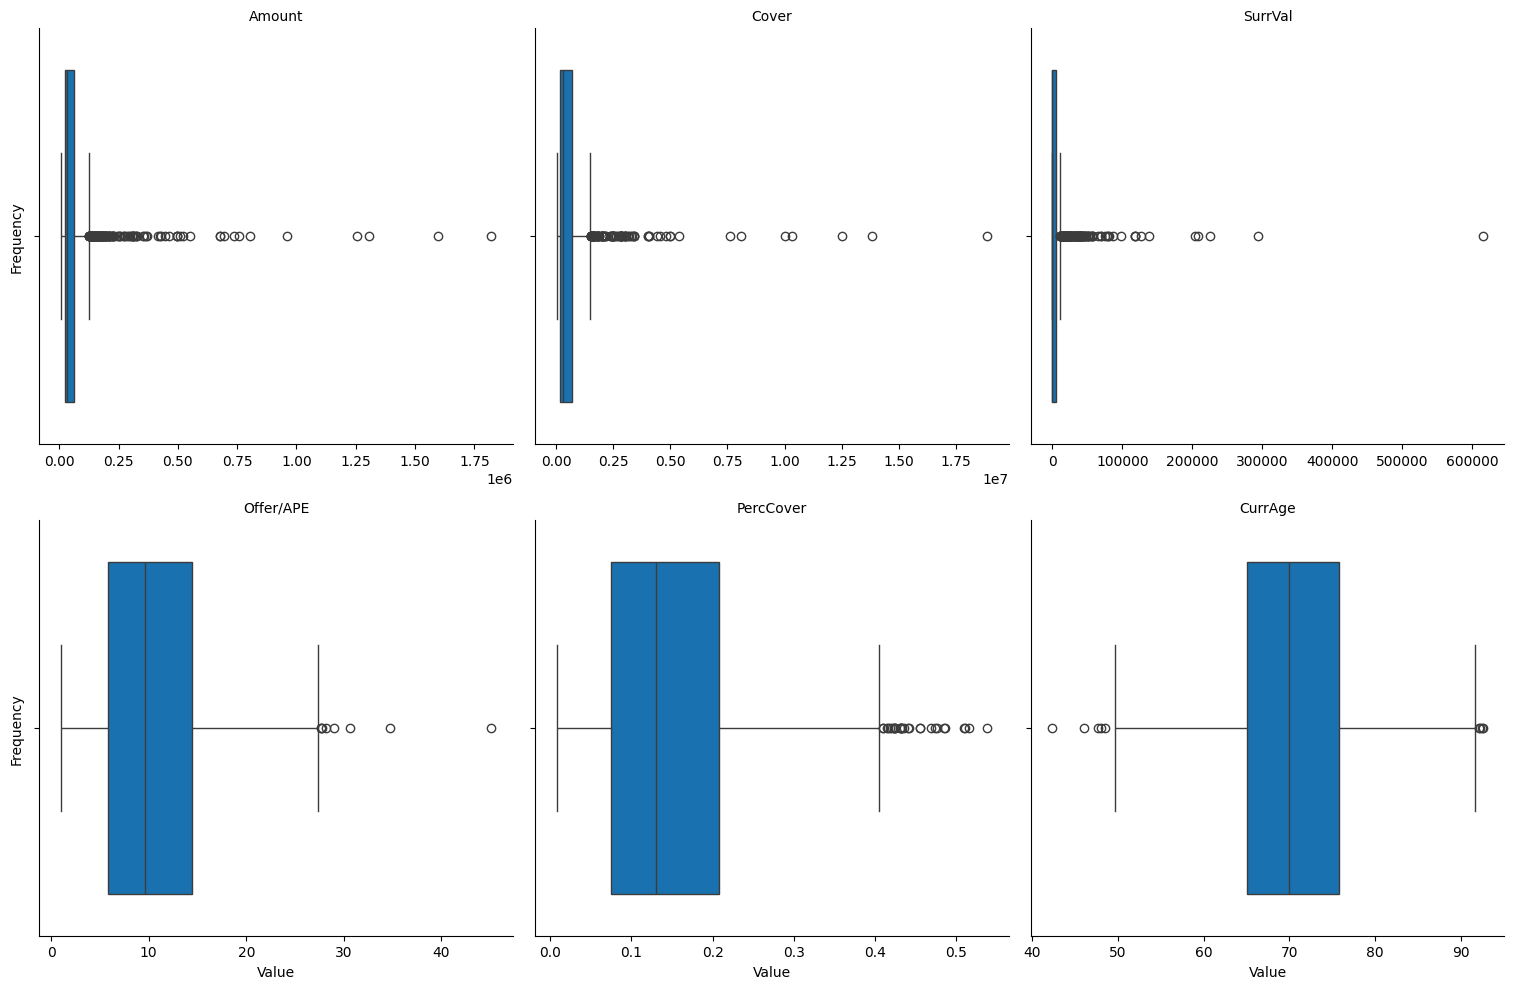

In [11]:
# Get the numeric columns only
df = topcover_data[['Amount', 'Cover', 'SurrVal', 'Offer/APE', 'PercCover', 'CurrAge']]

# Convert to long format
df_long = df.melt(var_name='variable', value_name='value')
# print(df_long.head())

# Create a FacetGrid
g = sns.FacetGrid(df_long, col='variable', col_wrap=3, height=5, sharex=False, sharey=False)

# Map the histplot to the FacetGrid
g.map(sns.boxplot, 'value', color='#0075C9')

# Adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Value", "Frequency")

# Show the plot
plt.show()

## 2. Correlation

Below we note the following:
* *'Cover'* and *'Amount'* are most correlated at 0.85
* *'PercCover'* and *'CurrAge'* are highly correlated at 0.66
* *'Amount'* and *'SurrVal'* are averagedly correlated at 0.50
* *'Offer/APE'* and *'PercCover'* are averagedly correlated at 0.48

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Amount'),
  Text(1.5, 0, 'Cover'),
  Text(2.5, 0, 'SurrVal'),
  Text(3.5, 0, 'Offer/APE'),
  Text(4.5, 0, 'PercCover'),
  Text(5.5, 0, 'CurrAge')])

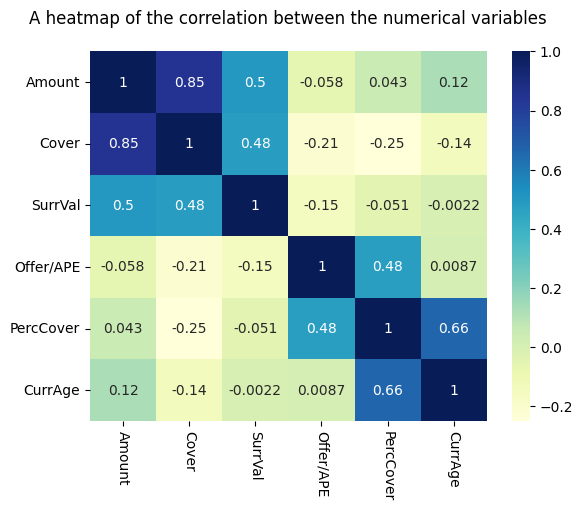

In [15]:
# Get the numeric columns only
df = topcover_data[['Amount', 'Cover', 'SurrVal', 'Offer/APE', 'PercCover', 'CurrAge']]

# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('A heatmap of the correlation between the numerical variables', pad=20)
plt.xticks(rotation=-90)

In [16]:
# Convert the dataframe containing the cor matrix into a series and sort in decending order
correlations = corr_matrix.unstack().sort_values(ascending=False)

# Remove auto correlations and remove the duplicates from the bottom half of the cor matrix
correlations = correlations[correlations != 1].drop_duplicates()
correlations

Amount     Cover        0.846148
CurrAge    PercCover    0.661227
SurrVal    Amount       0.497201
           Cover        0.482799
PercCover  Offer/APE    0.477466
Amount     CurrAge      0.124059
PercCover  Amount       0.043408
Offer/APE  CurrAge      0.008697
SurrVal    CurrAge     -0.002210
           PercCover   -0.050905
Amount     Offer/APE   -0.057585
Cover      CurrAge     -0.138183
Offer/APE  SurrVal     -0.149827
Cover      Offer/APE   -0.211244
           PercCover   -0.250134
dtype: float64

,Amount,Cover,SurrVal,Offer/APE,PercCover,CurrAge
0,6444,48024,0,1.5,0.134183,71.250000
1,9649,1000000,0,1.3,0.009649,60.916667
2,8688,800001,2250,1.1,0.010860,63.416667
3,7483,21713,0,4.7,0.344632,82.916667
4,8115,526919,0,1.3,0.015401,60.000000
...,...,...,...,...,...,...
1089,21024,122000,0,7.3,0.172328,77.500000
1090,116604,1603567,9398,6.7,0.072715,68.666667
1091,33361,650000,3390,15.5,0.051325,42.333333
1092,41296,188118,0,15.0,0.219522,77.583333


In [13]:
df_rating_groups_expanded = topcover_data_extended

df_rating_groups_expanded['Smoker_ind'] = df_rating_groups_expanded['RG']%2

def calc_socio_econ_class(x : int) -> int:
    if x <= 2:
        return 1
    elif x <= 4:
        return 2
    elif x <= 6:
        return 3
    elif x <= 8:
        return 4
    
df_rating_groups_expanded['Socio Economic Class'] = df_rating_groups_expanded['RG'].apply(calc_socio_econ_class)

df_rating_groups_expanded


,Pno,Amount,Gender,RG,Cover,SurrVal,Offer/APE,PercCover,CurrAge,Fee_claimed,Take-up ind,Mngt_act,APE,SurrVal/APE,SurrVal/Cover,Offer/SurrVal,SurrVal ind,age_bands,Smoker_ind,Socio Economic Class
0,1,6444,M,4,48024,0,1.5,0.134183,71.250000,0,0,BCD,4296.000000,0.000000,0.134183,NaN,0,1,0,2
1,2,9649,F,7,1000000,0,1.3,0.009649,60.916667,0,0,PIN,7422.307692,0.000000,0.009649,NaN,0,0,1,4
2,3,8688,M,8,800001,2250,1.1,0.010860,63.416667,0,0,PIN,7898.181818,0.284876,0.010860,3.861333,1,0,0,4
3,4,7483,F,4,21713,0,4.7,0.344632,82.916667,0,0,BCD,1592.127660,0.000000,0.344632,NaN,0,1,0,2
4,5,8115,M,8,526919,0,1.3,0.015401,60.000000,0,0,BCD,6242.307692,0.000000,0.015401,NaN,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1090,21024,M,8,122000,0,7.3,0.172328,77.500000,0,1,PIN,2880.000000,0.000000,0.172328,NaN,0,1,0,4
1090,1091,116604,F,8,1603567,9398,6.7,0.072715,68.666667,0,1,NaN,17403.582090,0.540004,0.072715,12.407321,1,1,0,4
1091,1092,33361,M,8,650000,3390,15.5,0.051325,42.333333,1,1,PIN,2152.322581,1.575043,0.051325,9.841003,1,0,0,4
1092,1093,41296,M,8,188118,0,15.0,0.219522,77.583333,0,1,PIN,2753.066667,0.000000,0.219522,NaN,0,1,0,4


# Data cleaning

TypeError: can only concatenate str (not "int") to str

In [17]:
features = ['Amount', 'Gender', 'Cover', 'SurrVal', 'Offer/APE',
            'PercCover', 'CurrAge', 'Fee_claimed', 'Take-up ind', 'Mngt_act','Socio Economic Class','Smoker_ind','SurrVal/APE','SurrVal/Cover','Offer/SurrVal', 'SurrVal ind', 'age_bands']

df_rating_groups_expanded

df_data_split = pd.get_dummies(df_rating_groups_expanded[features], columns=['Gender', 'Mngt_act', 'Socio Economic Class'])

df_data_split


,Amount,Cover,SurrVal,Offer/APE,PercCover,CurrAge,Fee_claimed,Take-up ind,Smoker_ind,SurrVal/APE,...,Mngt_act_,Mngt_act_ ACD,Mngt_act_ BCD,Mngt_act_ P5C,Mngt_act_ P5P,Mngt_act_ PIN,Socio Economic Class_1,Socio Economic Class_2,Socio Economic Class_3,Socio Economic Class_4
0,6444,48024,0,1.5,0.134183,71.250000,0,0,0,0.000000,...,False,False,True,False,False,False,False,True,False,False
1,9649,1000000,0,1.3,0.009649,60.916667,0,0,1,0.000000,...,False,False,False,False,False,True,False,False,False,True
2,8688,800001,2250,1.1,0.010860,63.416667,0,0,0,0.284876,...,False,False,False,False,False,True,False,False,False,True
3,7483,21713,0,4.7,0.344632,82.916667,0,0,0,0.000000,...,False,False,True,False,False,False,False,True,False,False
4,8115,526919,0,1.3,0.015401,60.000000,0,0,0,0.000000,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,21024,122000,0,7.3,0.172328,77.500000,0,1,0,0.000000,...,False,False,False,False,False,True,False,False,False,True
1090,116604,1603567,9398,6.7,0.072715,68.666667,0,1,0,0.540004,...,False,False,False,False,False,False,False,False,False,True
1091,33361,650000,3390,15.5,0.051325,42.333333,1,1,0,1.575043,...,False,False,False,False,False,True,False,False,False,True
1092,41296,188118,0,15.0,0.219522,77.583333,0,1,0,0.000000,...,False,False,False,False,False,True,False,False,False,True


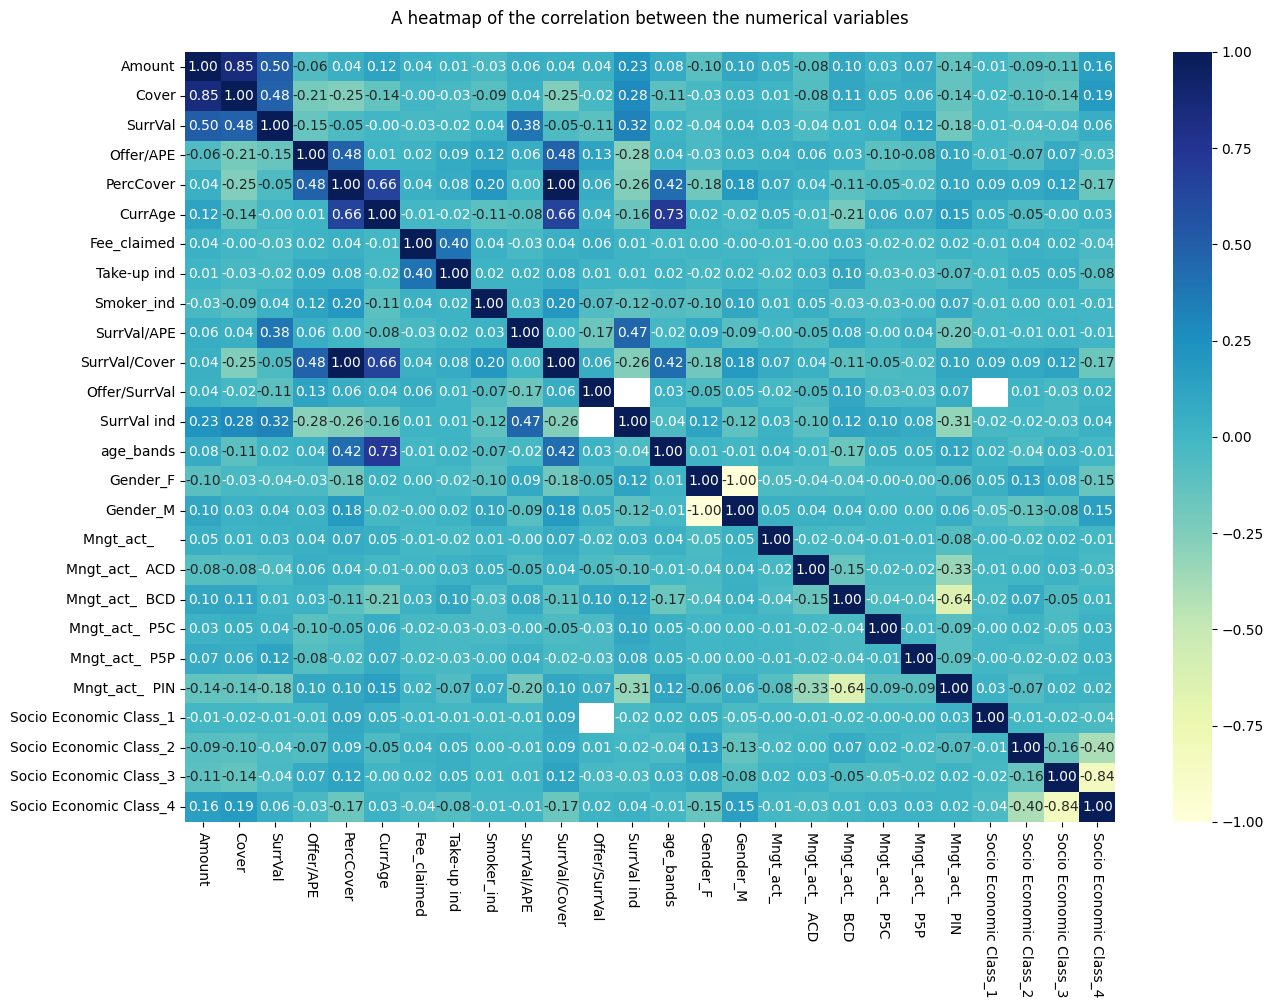

In [181]:
# Compute the correlation matrix
corr_matrix = df_data_split.corr()

parameter_corr_matrix = corr_matrix.drop(index='Take-up ind',columns='Take-up ind')

# Convert the dataframe containing the cor matrix into a series and sort in decending order
parameter_correlations = parameter_corr_matrix.unstack().sort_values(ascending=False)

# Remove auto correlations and remove the duplicates from the bottom half of the cor matrix
parameter_correlations = parameter_correlations[parameter_correlations != 1].drop_duplicates()
# display(corr_matrix.sort_values(['Take-up ind'], ascending=False))

# EXTRA
parameter_correlations.sort_values(ascending=False)


# Visualise the correlation matrix
if True:
    plt.figure(figsize=(15,10))
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f" )
    plt.title('A heatmap of the correlation between the numerical variables', pad=20)
    plt.xticks(rotation=-90)



In [182]:
target_correlations = corr_matrix['Take-up ind']


target_correlations= target_correlations.sort_values(ascending=False)

# Remove auto correlations and remove the duplicates from the bottom half of the cor matrix
target_correlations = target_correlations[target_correlations != 1].drop_duplicates()

target_correlations

Fee_claimed               0.395491
Mngt_act_  BCD            0.097385
Offer/APE                 0.085912
SurrVal/Cover             0.077139
Socio Economic Class_2    0.054060
Socio Economic Class_3    0.050008
Mngt_act_  ACD            0.027373
Gender_M                  0.021122
Smoker_ind                0.021035
SurrVal/APE               0.019955
age_bands                 0.015945
SurrVal ind               0.012931
Amount                    0.012098
Offer/SurrVal             0.010412
Socio Economic Class_1   -0.009804
SurrVal                  -0.017737
CurrAge                  -0.019266
Gender_F                 -0.021122
Mngt_act_                -0.021962
Mngt_act_  P5C           -0.026010
Mngt_act_  P5P           -0.026010
Cover                    -0.029895
Mngt_act_  PIN           -0.069913
Socio Economic Class_4   -0.075589
Name: Take-up ind, dtype: float64

In [118]:
# Investigate correlations between the input variables

# Convert the dataframe containing the cor matrix into a series and sort in decending order
correlations = corr_matrix.unstack().sort_values(ascending=False)

# Remove auto correlations and remove the duplicates from the bottom half of the cor matrix
correlations = correlations[correlations != 1].drop_duplicates()

top_5_corr = correlations.abs().head(5)
top_5_postive_corr = correlations.head(5)
top_5_negative_corr = correlations.tail(5).__invert__

print(top_5_corr,top_5_postive_corr,top_5_negative_corr)

Amount     Cover            0.846148
CurrAge    SurrVal/Cover    0.661227
PercCover  CurrAge          0.661227
Amount     SurrVal          0.497201
SurrVal    Cover            0.482799
dtype: float64 Amount     Cover            0.846148
CurrAge    SurrVal/Cover    0.661227
PercCover  CurrAge          0.661227
Amount     SurrVal          0.497201
SurrVal    Cover            0.482799
dtype: float64 <bound method NDFrame.__invert__ of Socio Economic Class_4  Socio Economic Class_2   -0.403362
Mngt_act_  PIN          Mngt_act_  BCD           -0.638206
Socio Economic Class_3  Socio Economic Class_4   -0.835762
Gender_M                Gender_F                 -1.000000
Offer/SurrVal           Socio Economic Class_1         NaN
dtype: float64>


## X. Jointplots

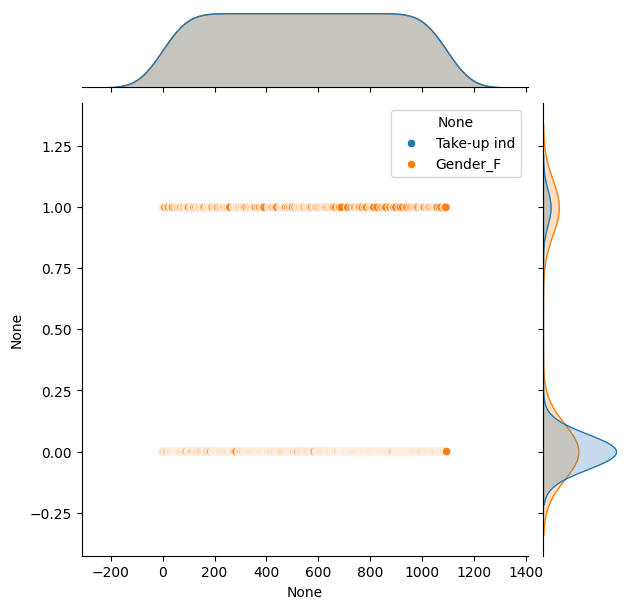

In [10]:
# # Create joint plots using seaborn
# sns.jointplot(x="Take-up ind", y="Amount", data=df_data_split[df_data_split["Take-up ind"] == 1], kind="reg")
# plt.suptitle('Jointplot', y=1)
# plt.show()


sns.jointplot(df_data_split[["Take-up ind", "Gender_F"]])
# plt.suptitle('Jointplot ', y=1)


In [22]:
df_data_split

,Amount,Cover,SurrVal,Offer/APE,PercCover,CurrAge,Fee_claimed,Take-up ind,Gender_F,Gender_M,...,RG_5,RG_6,RG_7,RG_8,Mngt_act_,Mngt_act_ ACD,Mngt_act_ BCD,Mngt_act_ P5C,Mngt_act_ P5P,Mngt_act_ PIN
0,6444,48024,0,1,0,71,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,9649,1000000,0,1,0,60,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,8688,800001,2250,1,0,63,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,7483,21713,0,4,0,82,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,8115,526919,0,1,0,60,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,21024,122000,0,7,0,77,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1090,116604,1603567,9398,6,0,68,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1091,33361,650000,3390,15,0,42,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1092,41296,188118,0,15,0,77,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


Text(0.5, 1, 'Jointplot ')

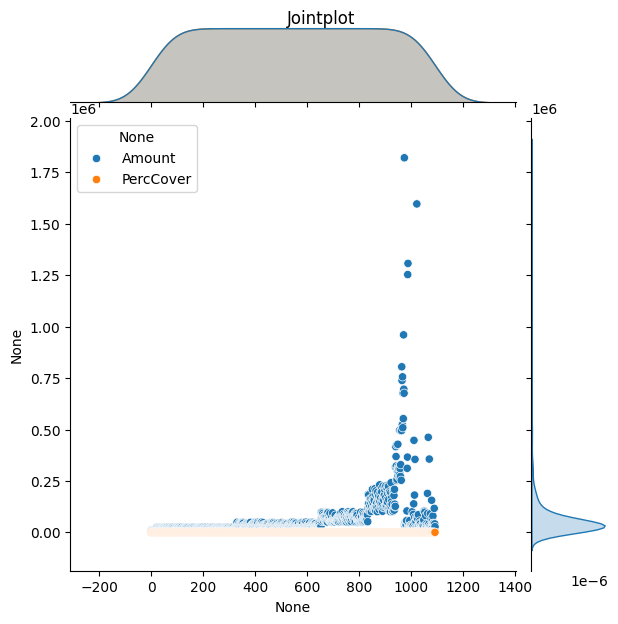

In [17]:
sns.jointplot(df_data_split[["Amount", "PercCover"]])
plt.suptitle('Jointplot ', y=1)

In [33]:
# Extract top 3 positive correlations
top_positive_correlations = correlations.head(3)

# Extract top 3 negative correlations
top_negative_correlations = correlations.tail(4)

print("Top 3 Positive Correlations:\n", top_positive_correlations)
print("Top 3 Negative Correlations:\n", top_negative_correlations)

Top 3 Positive Correlations:
 Cover    Amount     0.846148
Amount   SurrVal    0.497201
SurrVal  Cover      0.482799
dtype: float64
Top 3 Negative Correlations:
 RG_8            RG_6             -0.604507
Mngt_act_  PIN  Mngt_act_  BCD   -0.638206
Gender_M        Gender_F         -1.000000
Amount          PercCover              NaN
dtype: float64


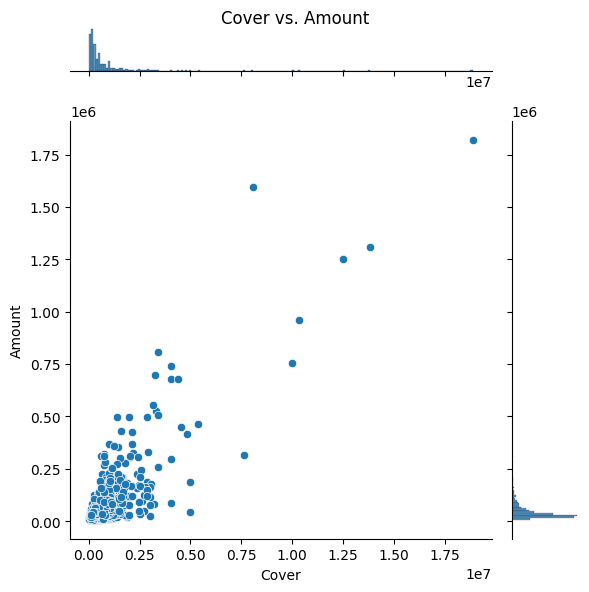

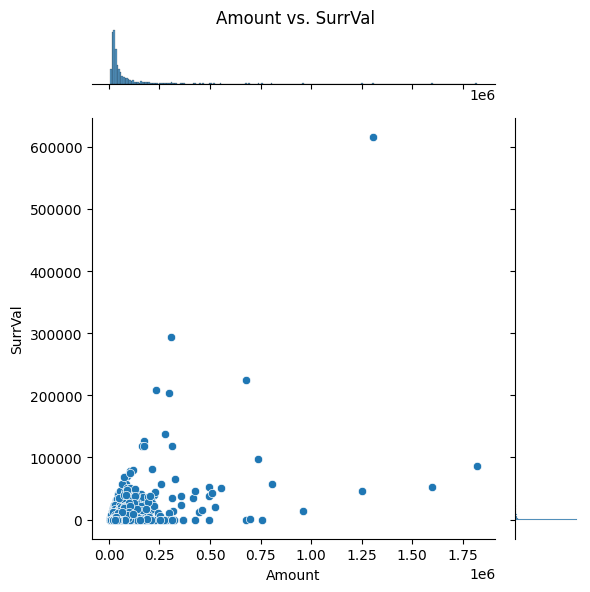

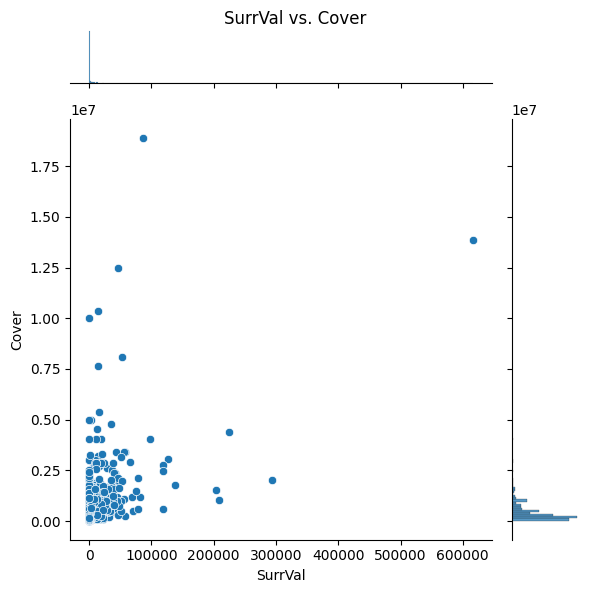

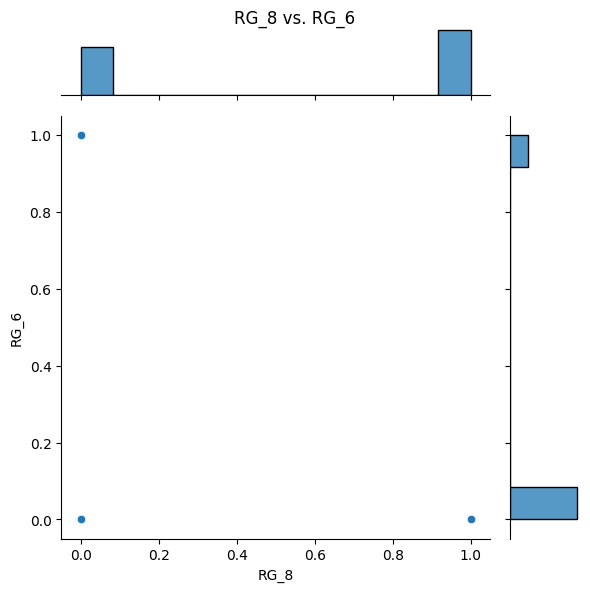

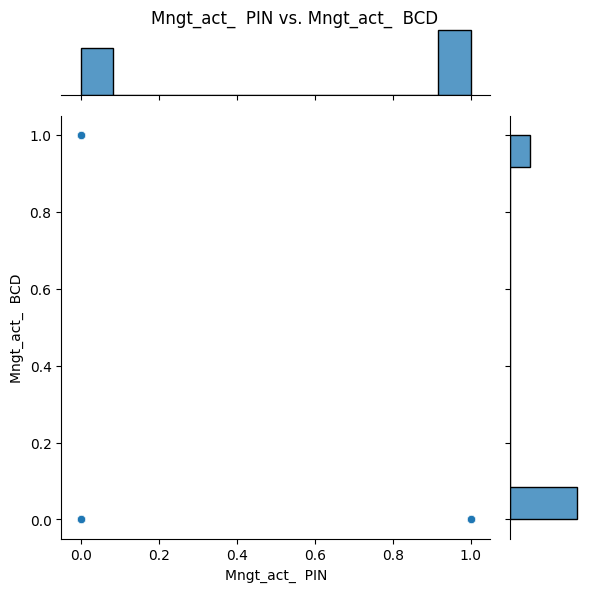

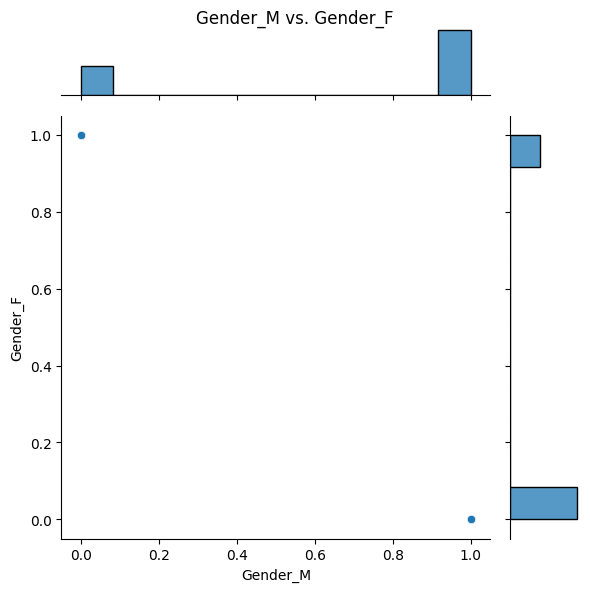

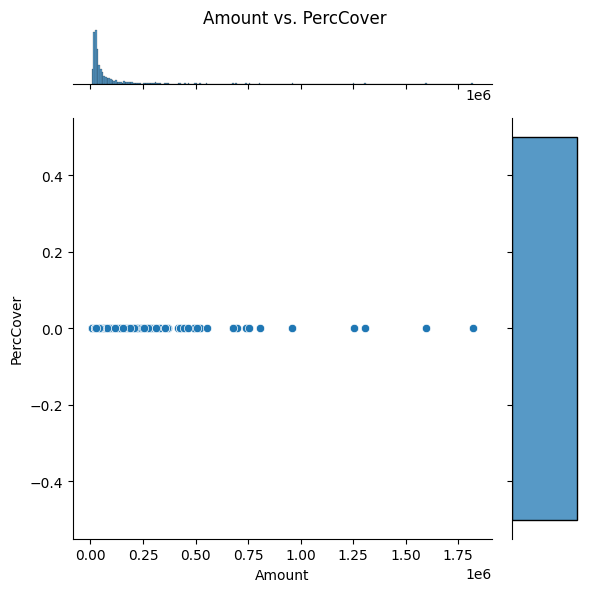

In [34]:
# Function to create and display joint plots
def create_joint_plot(x, y, data, kind='scatter', title=''):
    joint_plot = sns.jointplot(x=x, y=y, data=df_data_split, kind=kind)
    joint_plot.fig.suptitle(title)
    joint_plot.fig.tight_layout()
    joint_plot.fig.subplots_adjust(top=0.95)  # Adjust title position
    plt.show()


# Create joint plots for top 3 positive correlations
for (x, y) in top_positive_correlations.index:
    create_joint_plot(x=x, y=y, data=df_data_split, title=f'{x} vs. {y}')

# Create joint plots for top 4 negative correlations
for (x, y) in top_negative_correlations.index:
    create_joint_plot(x=x, y=y, data=df_data_split, title=f'{x} vs. {y}')

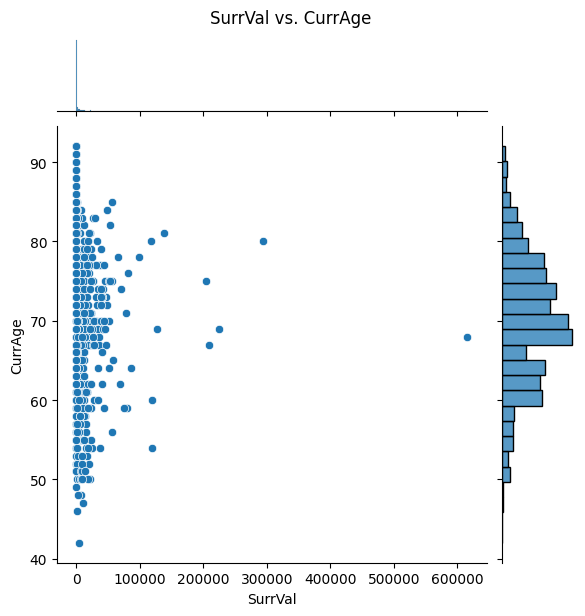

In [45]:

# Create the joint plot
joint_plot = sns.jointplot(x="SurrVal", y="CurrAge", data=df_data_split)

# Set the title and axis labels
joint_plot.set_axis_labels('SurrVal', 'CurrAge')
plt.suptitle('SurrVal vs. CurrAge', y=1.02)  # Adjust the y position of the title

# Show the plot
plt.show()


## 2. Pie of predictor variable, taken-up

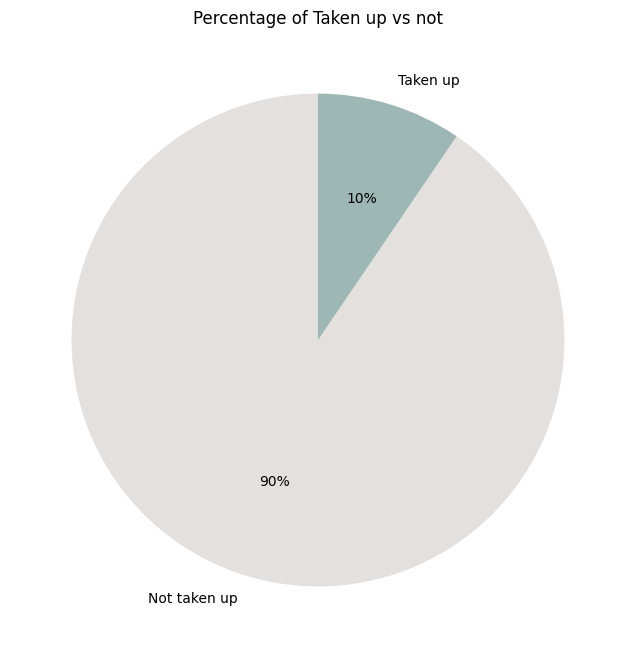

In [15]:
# colors = ['#E3E0DE','#9DB7B4','#5493BD','#76C2B6']

# Group -> rename -> sort
count_df = topcover_data.groupby('Take-up ind')['Pno'].count().reset_index()
count_df.rename(columns={'Pno': 'count'}, inplace=True)
# Calculate the total count to compute percentages
total_count = count_df['count'].sum()
count_df['percentage'] = round((count_df['count'] / total_count) * 100, 2)

# Plotting the pie chart
labels = ['Not taken up', 'Taken up'] # check and make sure of this
sizes = count_df['percentage']
colors = ['#E3E0DE', '#9DB7B4']

plt.figure(figsize=(8, 8))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%0.f%%', shadow=False, startangle=90)
plt.title('Percentage of Taken up vs not')
plt.show()

## 3. Plotting numerical variables

In [7]:
# # Plotting using Seaborn
# plt.figure(figsize=(10, 6))
# sns.histplot(data=topcover_data, x='Amount', bins=20, color='#0075C9')
# plt.title('Histogram of Amount')
# # plt.xticks(np.arange(0, 2, 0.25))
# plt.show()

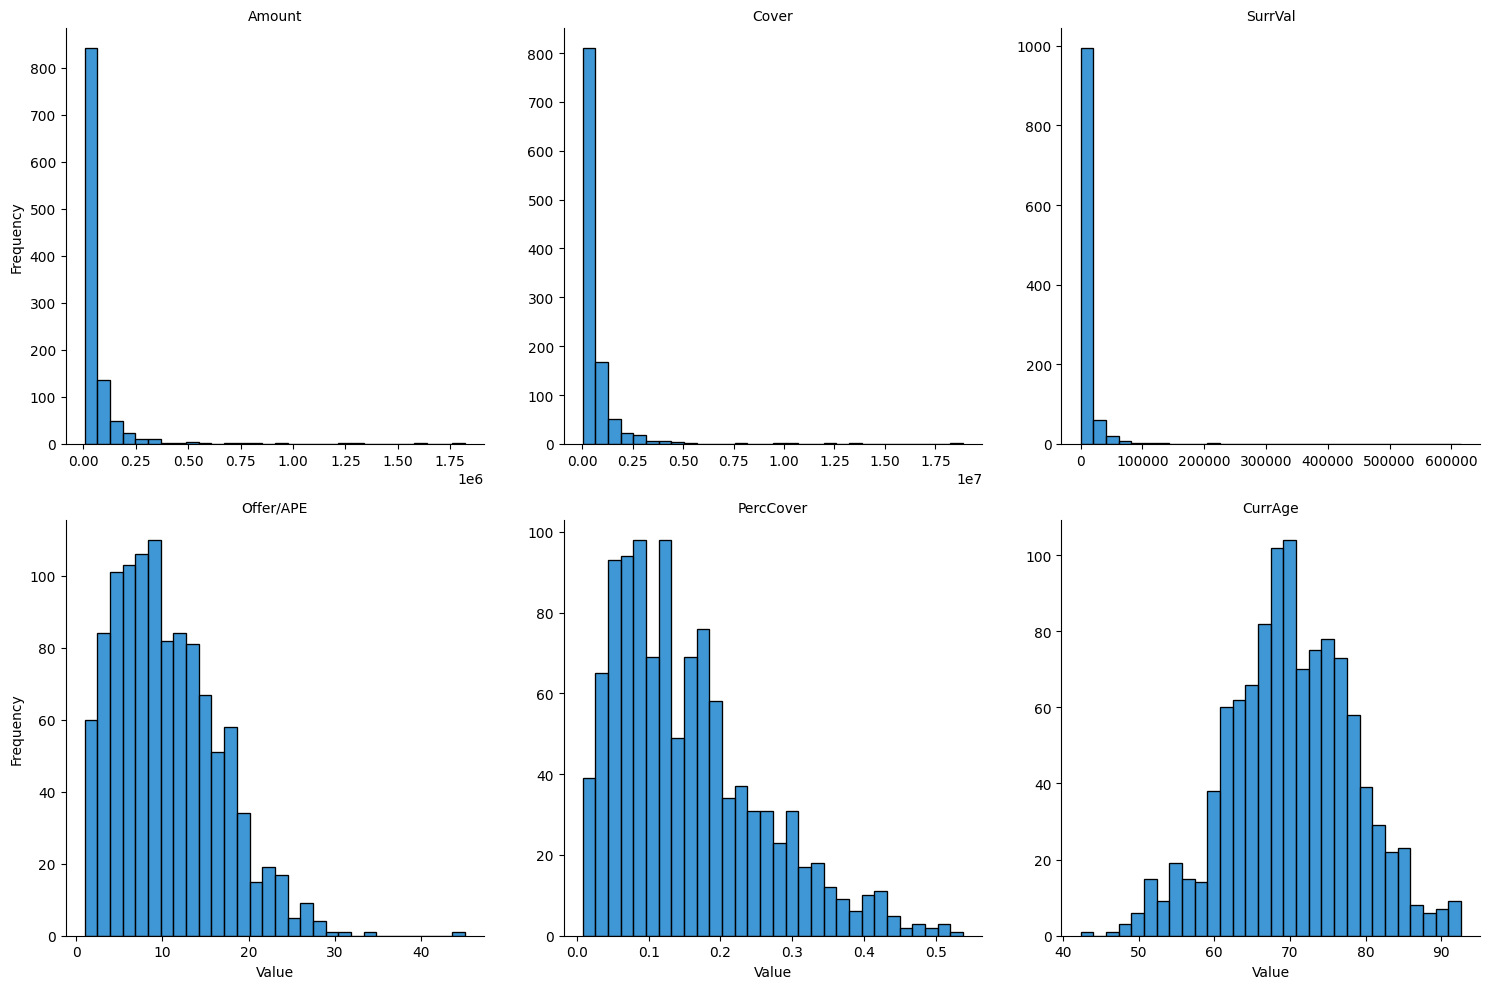

In [17]:
# Get the numeric columns only
df = topcover_data[['Amount', 'Cover', 'SurrVal', 'Offer/APE', 'PercCover', 'CurrAge']]

# Convert to long format
df_long = df.melt(var_name='variable', value_name='value')
# print(df_long.head())

# Create a FacetGrid
g = sns.FacetGrid(df_long, col='variable', col_wrap=3, height=5, sharex=False, sharey=False)

# Map the histplot to the FacetGrid
g.map(sns.histplot, 'value', bins=30, color='#0075C9')

# Adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Value", "Frequency")

# Show the plot
plt.show()

## 3. Plot Mngt_act percentage occurences

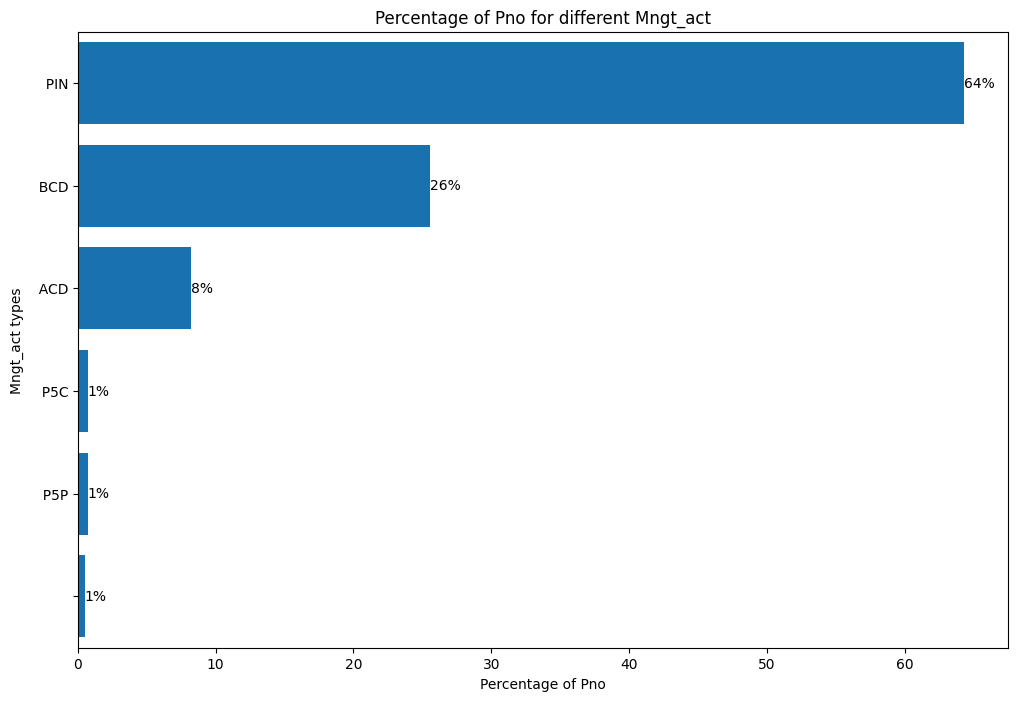

In [9]:
# Group -> rename -> sort
count_df = topcover_data.groupby('Mngt_act')['Pno'].count().reset_index()
count_df.rename(columns={'Pno': 'count'}, inplace=True)
# Calculate the total count to compute percentages
total_count = count_df['count'].sum()
count_df['percentage'] = round((count_df['count'] / total_count) * 100, 2)
count_df = count_df.sort_values(by='percentage', ascending=False)
# display(count_df)


#########################  PLOTTING  #########################
# Create a seaborn count plot

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=count_df, x='percentage', y='Mngt_act', color='#0075C9') # # change to 'count' otherwise
for container in ax.containers: # Annotate the bars with the percentage values
    ax.bar_label(container, fmt='%.0f%%', label_type='edge')
plt.title('Percentage of Pno for different Mngt_act')
plt.xlabel('Percentage of Pno')
plt.ylabel('Mngt_act types')
plt.show()

## 4. Plot RG percentage occurences (check and fix graph to be horizonal, code is exactly the same as previous?)

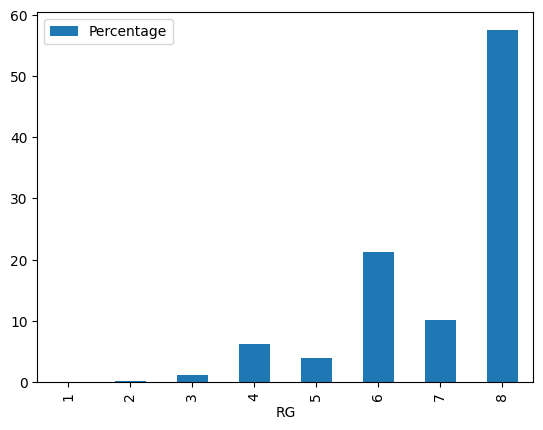

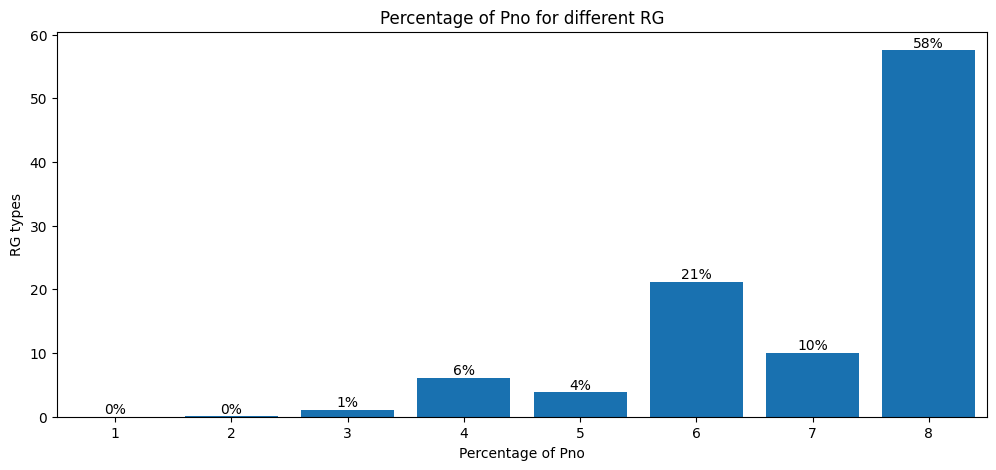

In [154]:
rg_counts = topcover_data['RG'].value_counts()
total_rg_count = rg_counts.sum()

rg_counts.loc[1] = 0
rg_counts = rg_counts.sort_index()
df_rg_counts = pd.DataFrame(rg_counts)

df_rg_counts['Percentage'] = df_rg_counts['count']/total_rg_count * 100


df_rg_counts['Percentage'].plot(kind='bar', legend=True,)


plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df_rg_counts, y='Percentage', x='RG', color='#0075C9') # # change to 'count' otherwise
for container in ax.containers: # Annotate the bars with the percentage values
    ax.bar_label(container, fmt='%.0f%%', label_type='edge')
plt.title('Percentage of Pno for different RG')
plt.xlabel('Percentage of Pno')
plt.ylabel('RG types')
plt.show()



,RG,count
0,2,1
1,3,12
2,4,67
3,5,42
4,6,232
5,7,110
6,8,630


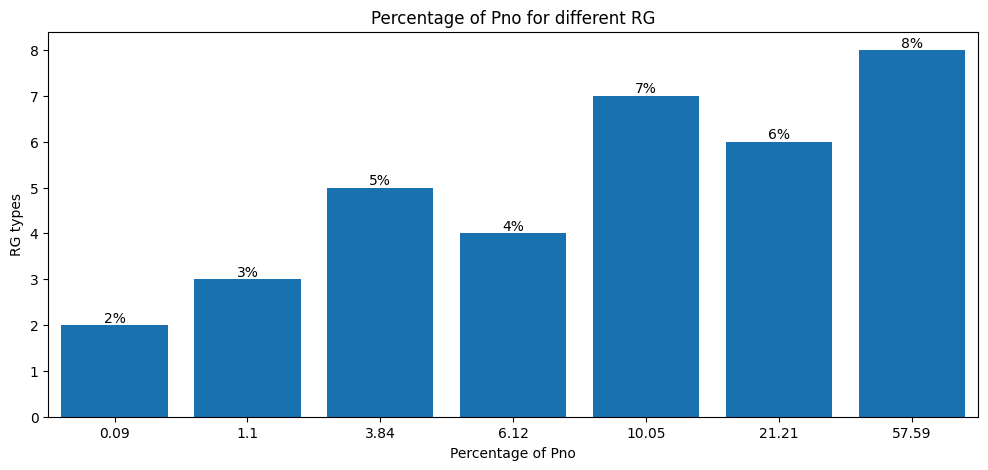

In [120]:
# Group -> rename -> sort
count_df = topcover_data.groupby('RG')['Pno'].count().reset_index()
count_df.rename(columns={'Pno': 'count'}, inplace=True)

# Calculate the total count to compute percentages
total_count = count_df['count'].sum()
count_df['percentage'] = round((count_df['count'] / total_count) * 100, 2)
count_df = count_df.sort_values(by='percentage', ascending=False)
count_df['RG'] = count_df['RG'].astype('object') # still not fixing the issue
# display(count_df)


#########################  PLOTTING  #########################
# Create a seaborn count plot

plt.figure(figsize=(12, 5))
ax = sns.barplot(data=count_df, x='percentage', y='RG', color='#0075C9') # # change to 'count' otherwise
for container in ax.containers: # Annotate the bars with the percentage values
    ax.bar_label(container, fmt='%.0f%%', label_type='edge')
plt.title('Percentage of Pno for different RG')
plt.xlabel('Percentage of Pno')
plt.ylabel('RG types')
plt.show()

## 5. Plot pie of Gender

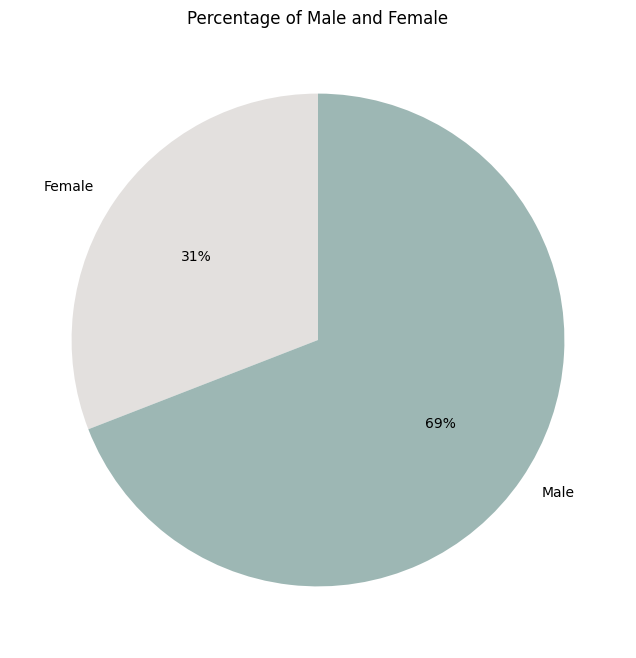

In [11]:
# colors = ['#E3E0DE','#9DB7B4','#5493BD','#76C2B6']

# Group -> rename -> sort
count_df = topcover_data.groupby('Gender')['Pno'].count().reset_index()
count_df.rename(columns={'Pno': 'count'}, inplace=True)
# Calculate the total count to compute percentages
total_count = count_df['count'].sum()
count_df['percentage'] = round((count_df['count'] / total_count) * 100, 2)

# Plotting the pie chart
labels = ['Female', 'Male'] # count_df['Gender']
sizes = count_df['percentage']
colors = ['#E3E0DE', '#9DB7B4']

plt.figure(figsize=(8, 8))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%0.f%%', shadow=False, startangle=90)
plt.title('Percentage of Male and Female')
plt.show()

## 6. Plot pie of Fee_claimed

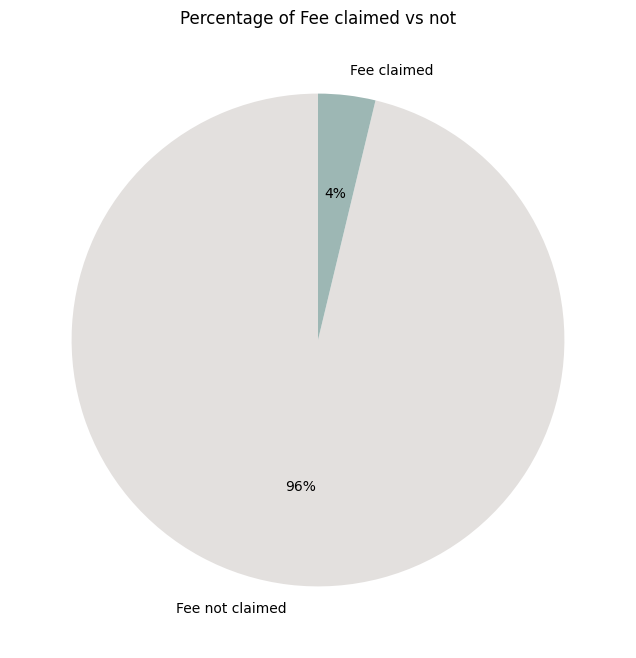

In [12]:
# colors = ['#E3E0DE','#9DB7B4','#5493BD','#76C2B6']

# Group -> rename -> sort
count_df = topcover_data.groupby('Fee_claimed')['Pno'].count().reset_index()
count_df.rename(columns={'Pno': 'count'}, inplace=True)
# Calculate the total count to compute percentages
total_count = count_df['count'].sum()
count_df['percentage'] = round((count_df['count'] / total_count) * 100, 2)

# Plotting the pie chart
labels = ['Fee not claimed', 'Fee claimed'] # check and make sure of this
sizes = count_df['percentage']
colors = ['#E3E0DE', '#9DB7B4']

plt.figure(figsize=(8, 8))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%0.f%%', shadow=False, startangle=90)
plt.title('Percentage of Fee claimed vs not')
plt.show()